In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

# Add docstrings to all functions!
# add note about why the loss_hist oscillates so much (because it is not batch gd or even mini-batch gd)

In [53]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
np.place(y, y==0, -1)

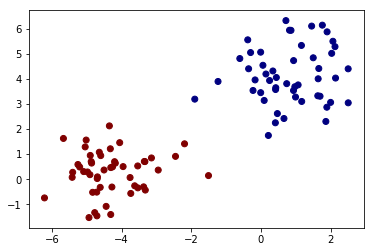

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

---

In [56]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [57]:
X = add_intercept(X)

In [85]:
def hinge_loss(X_i, y_i, weights):
    loss = 1 - y_i * np.dot(weights.T, X_i)
    if loss < 0:
        loss = 0
    return loss

In [88]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], w))
total_loss = np.sum(loss)
total_loss

100.0

In [89]:
w

array([ 0.,  0.,  0.])

In [95]:
learning_rate = 1
num_iters = 1000
w = np.zeros(len(X[0]))
# lambda = 1/iteration
loss_hist = []


for iteration in range(1, num_iters):
    for i in range(len(X)):
        loss = hinge_loss(X[i], y[i], w)
        loss_hist.append(loss)
        if loss == 0:
            w = w - learning_rate * ((2  * (1/iteration) * w))
        else:
            w = w - learning_rate * ((-y[i] * X[i]) + (2  * (1/iteration) * w))
            

In [96]:
w

array([  2.12889977e-03,  -3.55624119e+00,  -2.75181965e+00])

In [97]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], w))
total_loss = np.sum(loss)
total_loss

0

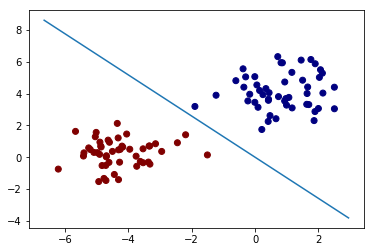

In [107]:
# it works, we've found the perfectly separating hyperplane!
plt.scatter(X[:,1], X[:,2], c=y, cmap = 'jet')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
plt.plot(xx, (-w[1]/w[2]) * xx - (w[0]/w[2]))

In [106]:
loss_hist

[1.0,
 0,
 14.626091617444512,
 0,
 37.293496630921005,
 0,
 14.923788437492743,
 0,
 50.953104526271687,
 0,
 86.398890015039512,
 0,
 36.314609336120867,
 0,
 66.966383647740656,
 0,
 103.32503222425265,
 0,
 73.730245896166167,
 0,
 46.225827810176163,
 0,
 96.875950134102908,
 0,
 76.308004982343064,
 0,
 169.59593559673971,
 0,
 190.48189042678428,
 0,
 87.417619939555294,
 0,
 130.29246650738631,
 0,
 186.13524659050015,
 0,
 220.94598225633803,
 0,
 54.486573236174287,
 0,
 167.83470979684165,
 0,
 33.260558571938077,
 0,
 289.24762830145346,
 0,
 218.06197922516535,
 12.744086604804437,
 330.88287214731997,
 0,
 240.69735100673458,
 0,
 306.12537434587603,
 0,
 365.65474949653094,
 0,
 280.13127244484667,
 0,
 217.97584857176241,
 0,
 390.81977195351851,
 0,
 364.39617256444592,
 0,
 334.97993380689491,
 0,
 503.99333493279664,
 0,
 301.81815214918748,
 0,
 366.67350385391097,
 0,
 526.05377850962225,
 0,
 365.15325862047007,
 0,
 441.6160799349891,
 0,
 452.14395298882459,
 0,